Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64
Transaction Summary:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


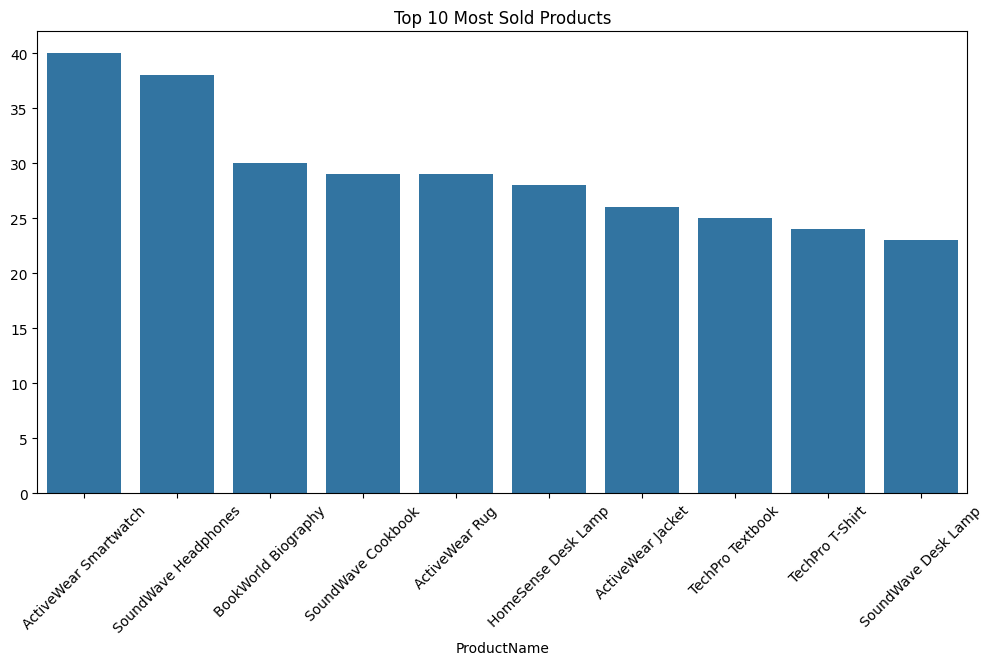

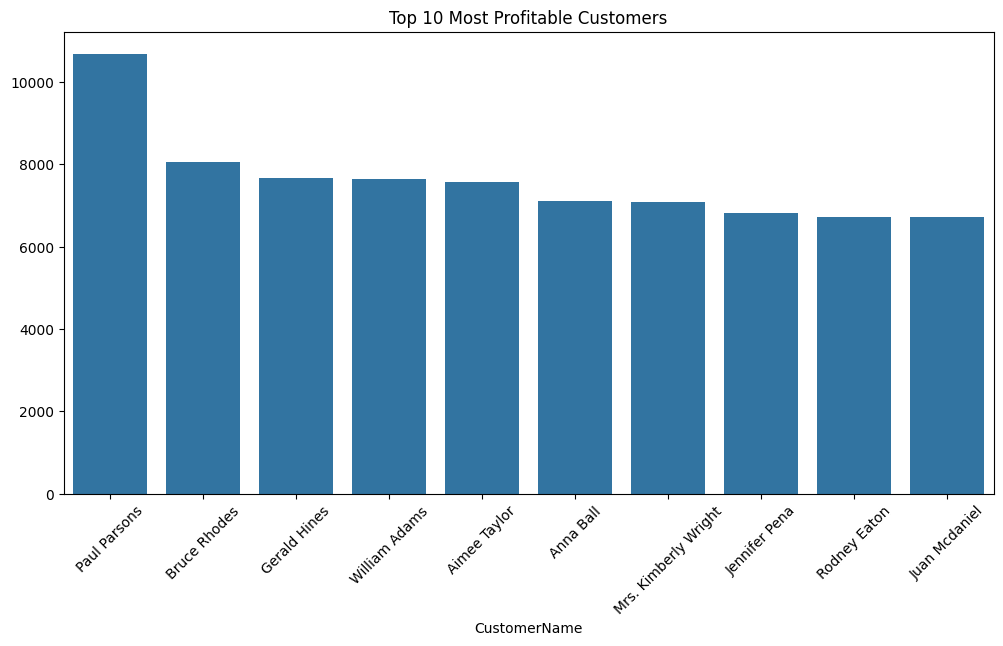

Number of repeat customers: 187


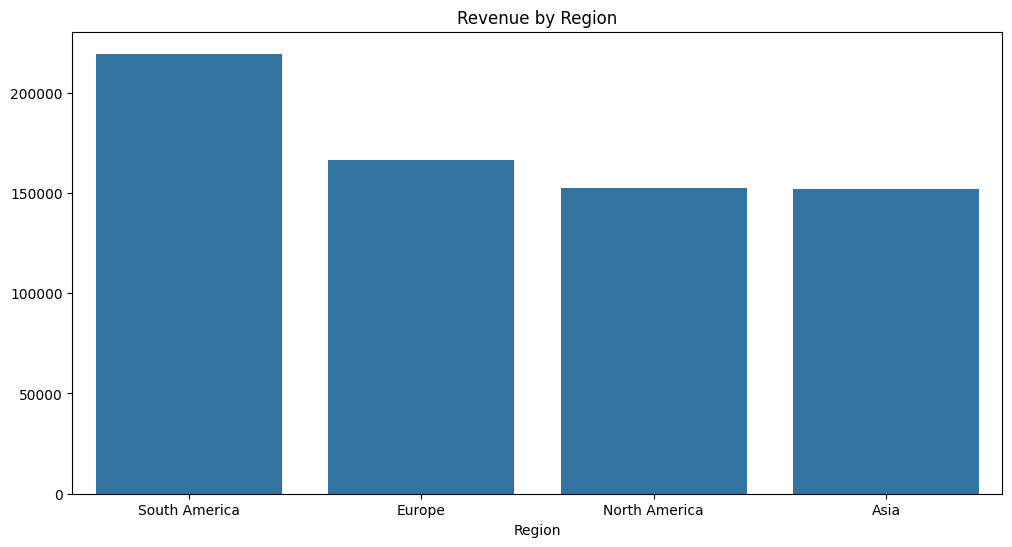

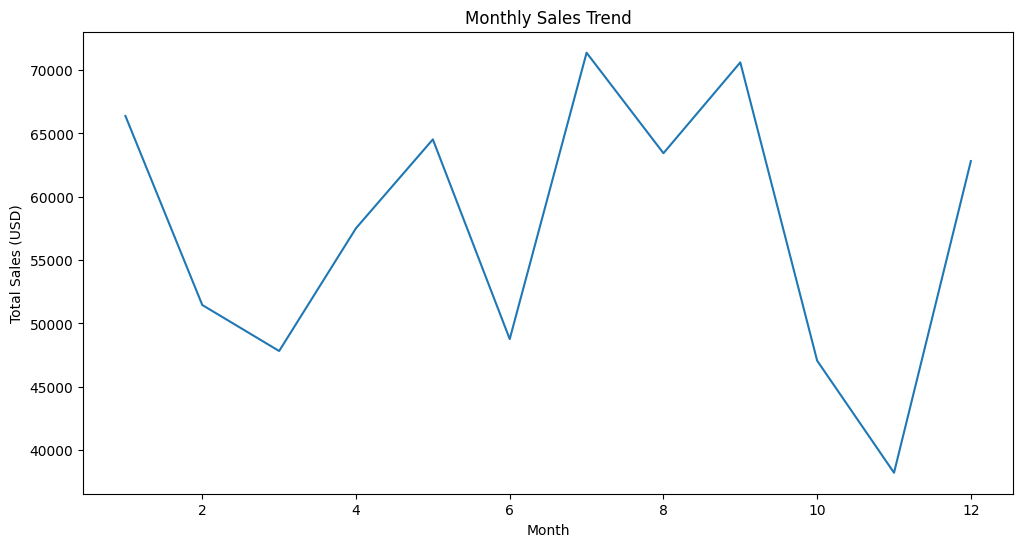

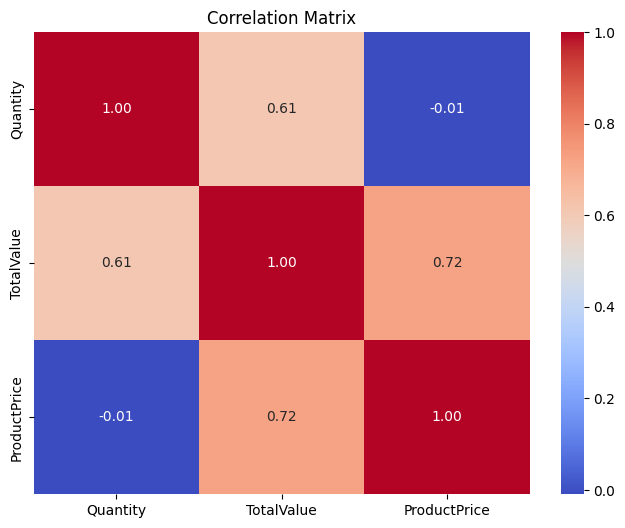

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv(r"C:\Users\hai\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\hai\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\hai\Downloads\Transactions.csv")

# Merge transactions with customer and product data
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Data Cleaning: Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Summary statistics for numerical features
print("Transaction Summary:\n", data.describe())

# Business Insight 1: Top 10 Most Sold Products
top_products = data["ProductName"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Sold Products")
plt.show()

# Business Insight 2: Most Profitable Customers (based on total value)
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Profitable Customers")
plt.show()

# Business Insight 3: Repeat Customers
repeat_customers = data['CustomerID'].value_counts().reset_index()
repeat_customers.columns = ['CustomerID', 'TransactionCount']
repeat_customers = repeat_customers[repeat_customers['TransactionCount'] > 1]
print(f"Number of repeat customers: {len(repeat_customers)}")

# Business Insight 4: Highest Revenue-Generating Regions
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Revenue by Region")
plt.show()

# Business Insight 5: Sales Trends over Time (seasonality)
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

# Optional: Correlation matrix for numerical features
# Rename the Price column in 'products' file to avoid ambiguity
data.rename(columns={"Price_x": "TransactionPrice", "Price_y": "ProductPrice"}, inplace=True)

# Now calculate the correlation matrix using the correct columns
correlation = data[['Quantity', 'TotalValue', 'ProductPrice']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()